# Logica detras del dijkstra

para no complicarnos haremos una tabla en csv que contendra las coordenadas de cada punto

nombre de punto, coordenada

- primero se carga la tabla

- despues preguntamos la trayectoria, punto inicial a punto final

- hacemos iteracion en arbol, desde el punto inicial hasta el punto final, gualdando siempre la menor distancia (o menor hipotenusa)

- finalmente haremos una iteracion reversa, para obtener la ruta mas corta

para sacar la distancia usamos la siguiente formula.

distancia = sqrt((x1-x2)^2 + (y1-y2)^2)

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Funciones

In [296]:
def getData(file):
    data = pd.read_csv(file)
    npdata = data.to_numpy()
    paths = []
    for path in npdata[:, 3]:
        paths.append(path.split(','))
    return npdata, paths

In [297]:
def getDistance(a, b):
    distance = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    return distance

In [298]:
def plotDots(dots):
    plt.clf()
    plt.scatter(dots[:,1],dots[:,2])
    #plt.plot(dots[1:3,1],dots[1:3,2])
    for label, x, y in zip(dots[:,0], dots[:,1], dots[:,2]):
        plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha="center")
                 

In [299]:
def plotDefRoute(dots, paths):
    plt.clf()
    plt.scatter(dots[:,1],dots[:,2])
    for idx, path in enumerate(paths):
        for line in path:
            x = [dots[idx, 1]]
            y = [dots[idx, 2]]
            for lidx, letter in enumerate(dots[:, 0]):
#                 print(letter, line)
                if letter == line:
                    x.append(dots[lidx, 1])
                    y.append(dots[lidx, 2])
#             print(x, y)
            plt.plot(x, y)
    for label, x, y in zip(dots[:,0], dots[:,1], dots[:,2]):
        plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(10,10),
                 ha="center")
                 

In [300]:
def plotRoute(dots, paths):
    plt.clf()
    plt.scatter(dots[:,1],dots[:,2])
    for idx, path in enumerate(paths):
        x = [dots[path[0], 1]]
        y = [dots[path[0], 2]]
        x.append(dots[path[1], 1])
        y.append(dots[path[1], 2])
        plt.plot(x, y)
        
    for label, x, y in zip(dots[:,0], dots[:,1], dots[:,2]):
        plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(10,10),
                 ha="center")
                 

In [301]:
def getDotIdx(dots, letter):
    letterIdx = dots[:,0] == letter
    for idx, lbool in enumerate(letterIdx):
        if lbool:
            return idx

# Logica detras de las iteraciones
- 1ra iteracion, iteracion de conseguir distancias
- 2da iteracion, suma de distancia segun ruta y niveles
- 3ra iteracion, iteracion en reversa

In [302]:
def dijkstra(dots, a, b):
    
    inTarget = False
    froute = np.array([])
    visited = np.array([])
    neighbors = np.array([])
    distances = np.array([])
    start = getDotIdx(dots, a)
    
    pdots = [start]
    # neighbours = dots[getDotIdx(dots, a), 3].split(',')
    
    while not inTarget:
        apdots = np.array([])
        for pdot in np.intc(pdots):
            neighbors = dots[pdot, 3].split(',')
            for ndot in neighbors:
                ndotid = getDotIdx(dots, ndot)
                try:
#                     print('try')
#                     if ((pdot not in visited[:, 0] and ndotid not in visited[:, 1]) and (pdot not in visited[:, 1] and ndotid not in visited[:, 0])):
                    visited = np.append(visited, [[pdot, ndotid]], axis=0)
                    distances = np.append(distances, [[pdot, ndotid, getDistance(dots[pdot, 1:], dots[ndotid, 1:])]], axis=0)
                except:
#                     print('except')
#                     print(distances)
                    if distances.size == 0:
                        distances = np.array([[pdot, ndotid, getDistance(dots[pdot, 1:], dots[ndotid, 1:])]])
                    else:
                        distances = np.append(distances, [[pdot, ndotid, getDistance(dots[pdot, 1:], dots[ndotid, 1:])]], axis=0)
                        
                    if visited.size == 0:
                        visited = np.array([[pdot, ndotid]])
#                         print(visited)
                    else:
#                         print(visited)
                        visited = np.append(visited, [[pdot, ndotid]], axis=0)
#                         print(visited)
                
#                 print(distances)
                
                try:
#                     print('try pdot ' + str(pdot))
                    if ndotid in froute[:, 0] and pdot in froute[:, 0]:
                        if(froute[np.where(froute[:, 0] == ndotid)[0][0], 1] > (froute[np.where(froute[:, 0] == pdot)[0][0], 1] + distances[-1, -1])):
                            froute[np.where(froute[:, 0] == ndotid)[0][0], 1] = froute[np.where(froute[:, 0] == pdot)[0][0], 1] + distances[-1, -1]
                            froute[np.where(froute[:, 0] == ndotid)[0][0], 2] = np.append(froute[np.where(froute[:, 0] == pdot)[0][0], 2][:-1], ndotid)
                    elif ndotid not in froute[:, 0] and pdot in froute[:, 0]:
                        froute = np.append(froute, [[ndotid, froute[np.where(froute[:, 0] == pdot)[0][0], 1] + distances[-1, -1], np.append(froute[np.where(froute[:, 0] == pdot)[0][0], 2], ndotid)]],  axis=0)
                    else:
                        try:
                            if froute.size == 0:
                                froute = np.array([[ndotid, distances[-1, -1], [[start, ndotid]]]], dtype='object')
                            else:
                                froute = np.append(froute, [[ndotid, distances[-1, -1], [[start, ndotid]]]], axis=0)
                        except:
                            if froute.size == 0:
                                froute = np.array([[ndotid, distances[-1], [[start, ndotid]]]], dtype='object')
                            else:
                                froute = np.append(froute, [[ndotid, distances[-1], [[start, ndotid]]]], axis=0)
                except Exception as e:
                    try:
                        if froute.size == 0:
                            froute = np.array([[ndotid, distances[-1, -1], [[start, ndotid]]]], dtype='object')
                        else:
                            froute = np.append(froute, [[ndotid, distances[-1, -1], [[start, ndotid]]]], axis=0)
                    except:
                        if froute.size == 0:
                            froute = np.array([[ndotid, distances[-1], [[ndotid]]]], dtype='object')
                        else:
                            froute = np.append(froute, [[ndotid, distances[-1], [[start, ndotid]]]], axis=0)
                
                apdots = np.append(apdots, [ndotid])
            if getDotIdx(dots, b) == pdot:
                inTarget = True;
                break
        
            pdots = apdots
#             print('pdots: ' + str(pdots))
            
#     print('Distances')
#     print(distances)
#     print('Visited')
#     print(visited)
#     print('Routes')
#     print(froute)
    return(froute[np.where(froute[:, 0] == getDotIdx(dots, b))])

In [303]:
def showRoute(dots, route):
    path = []
    for idx, dot in enumerate(route[:-1]):
#         print(dot)
#         path.append([dots[dot, 0], dots[route[idx+1], 0]])
        path.append([dot, route[idx+1]])
    
#     print(path)
    plotRoute(dots, path)
    plt.show()

# Ejecucion

In [304]:
file = "Coordenadas.csv"
dots, paths = getData(file)
# print(dots)
# print(paths)

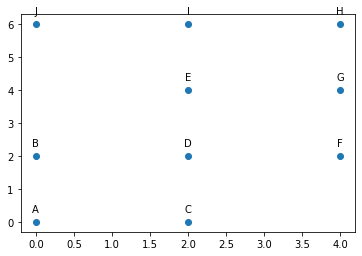

In [306]:
plotDots(dots)
plt.show()

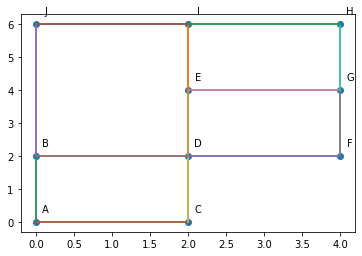

In [307]:
plotDefRoute(dots,paths)
plt.show()

In [315]:
result = dijkstra(dots, 'A', 'G')

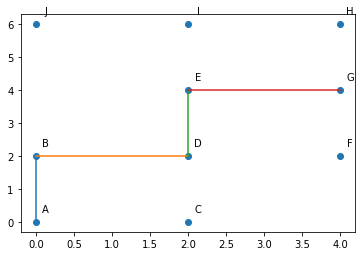

In [316]:
# print(result[0, 2])
showRoute(dots, result[0, 2])